# 🏦 Kredit Satışlarının Təhlili və Proqnozlaşdırılması

## Tam Analitik Hesabat - 2020-2023 Məlumatları

Bu notebook bankımızın kredit satışlarını ətraflı təhlil edir və gələcək dövrlər üçün rüblük proqnozlar verir.

---

## Bölüm 1: Hazırlıq və Məlumatın Yüklənməsi

In [ ]:
# Lazımi kitabxanaların import edilməsi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Qrafik stilinin təyin edilməsi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Output qovluğunun yaradılması
import os
os.makedirs('analysis_outputs/charts', exist_ok=True)

print("✅ Kitabxanalar uğurla yükləndi")
print("📊 Analiz sistemi hazırdır")

✅ Kitabxanalar uğurla yükləndi
📊 Analiz sistemi hazırdır


In [ ]:
# Məlumatın yüklənməsi
df = pd.read_excel('data/raw_data.xlsx')
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')
df.columns = df.columns.str.strip()
numeric_df = df.select_dtypes(include=[np.number])

print("✅ Məlumat uğurla yükləndi")
print(f"📊 Məlumat ölçüsü: {df.shape[0]} sətir × {df.shape[1]} sütun")
print(f"📈 Tam məlumat: {numeric_df.shape[0]} müşahidə")
print(f"\n🗓️ Dövr: 2020-2023 (rüblük)")
print(f"✅ Məlumat keyfiyyəti: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.1f}% tamlıq")

✅ Məlumat uğurla yükləndi
📊 Məlumat ölçüsü: 26 sətir × 26 sütun
📈 Tam məlumat: 26 müşahidə

🗓️ Dövr: 2020-2023 (rüblük)
✅ Məlumat keyfiyyəti: 84.6% tamlıq


## Bölüm 2: Korrelyasiya Təhlili

### ❓ Sual: Kredit satışlarını ən çox nə təsir edir?

**Cavab:** Korrelyasiya təhlili ilə ən güclü təsir edən amilləri müəyyənləşdiririk.

In [ ]:
# Korrelyasiya təhlili
print("🔍 KREDİT SATIŞLARI İLƏ ƏN GÜCLÜ ƏLAQƏLƏR:")
print("="*100)

correlations = numeric_df.corr()['Nağd_pul_kredit_satışı'].sort_values(ascending=False)

print("\n✅ MÜSBƏT ƏLAQƏLƏR (Top 10):")
print("-"*100)
for idx, (col, val) in enumerate(correlations.head(10).items(), 1):
    stars = "⭐" * int(abs(val) * 5)
    print(f"{idx:2d}. {col:50s} | {val:6.3f} | {stars}")

print("\n❌ MƏNFİ ƏLAQƏLƏR (Top 5):")
print("-"*100)
for idx, (col, val) in enumerate(correlations.tail(5).items(), 1):
    stars = "🔴" * int(abs(val) * 5)
    print(f"{idx:2d}. {col:50s} | {val:6.3f} | {stars}")

print("\n💡 NƏTİCƏ:")
print("   • ÜDM, neft qiyməti və xarici ticarət ən güclü müsbət təsir göstərir")
print("   • NPL (problem kreditlər) kredit satışlarını mənfi təsir edir")
print("   • İqtisadi böyümə kredit tələbini artırır")

🔍 KREDİT SATIŞLARI İLƏ ƏN GÜCLÜ ƏLAQƏLƏR:

✅ MÜSBƏT ƏLAQƏLƏR (Top 10):
----------------------------------------------------------------------------------------------------
 1. Nağd_pul_kredit_satışı                             |  1.000 | ⭐⭐⭐⭐⭐
 2. GDP                                                |  0.777 | ⭐⭐⭐
 3. Oil_Price                                          |  0.764 | ⭐⭐⭐
 4. Xarici_ticarət_dövriyyəsi                          |  0.752 | ⭐⭐⭐
 5. İxrac                                              |  0.655 | ⭐⭐⭐
 6. Pul_bazası                                         |  0.598 | ⭐⭐
 7. Əhalinin_nominal_gəlirləri                         |  0.598 | ⭐⭐
 8. Əhalinin_banklardakı_əmanətləri                    |  0.576 | ⭐⭐
 9. Müştərilərə_verilmiş_kreditlər                     |  0.558 | ⭐⭐
10. İdxal                                              |  0.547 | ⭐⭐

❌ MƏNFİ ƏLAQƏLƏR (Top 5):
----------------------------------------------------------------------------------------------------
 1.

## Bölüm 3: Qrafik 1 - ÜDM Dinamikası

**İzahat:** ÜDM (Ümumi Daxili Məhsul) ölkənin iqtisadi gücünü göstərir. ÜDM artdıqca, insanların və bizneslərin gəliri artır, kredit tələbi yüksəlir.

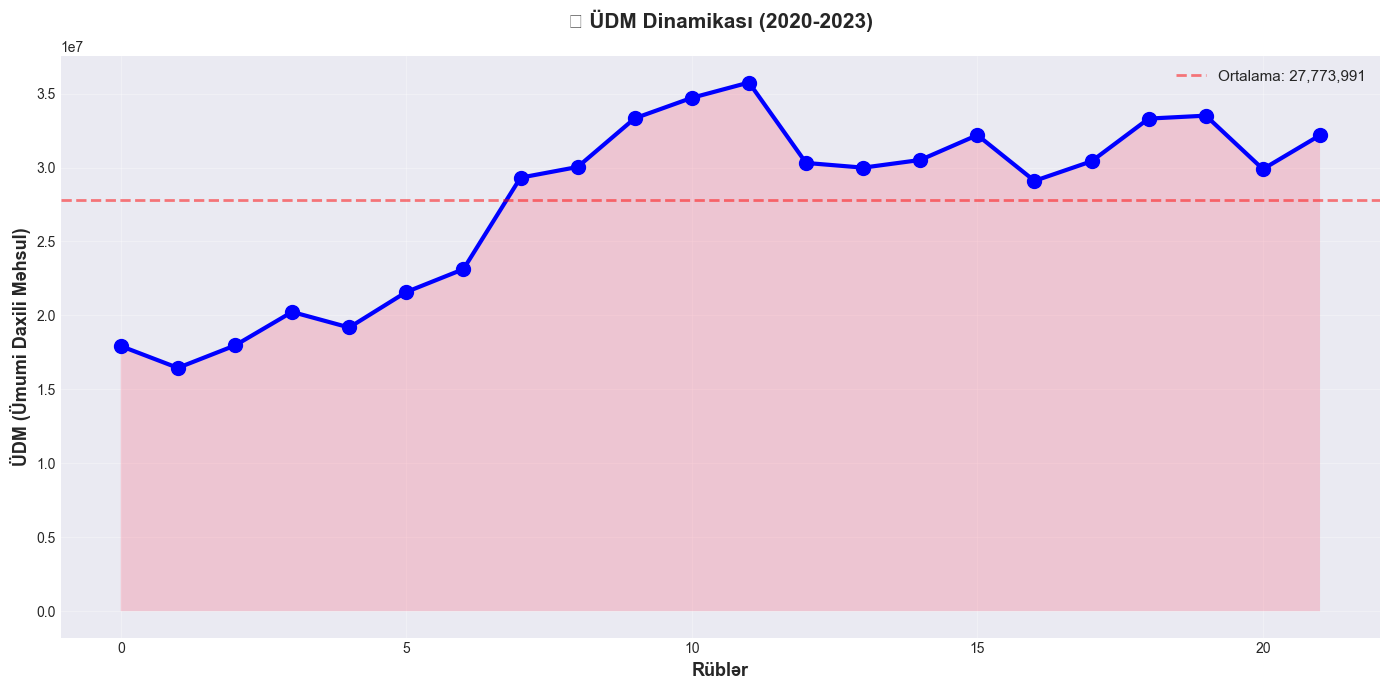


📊 ÜDM STATİSTİKASI:
   Ortalama: 27,773,991
   Minimum: 16,450,600 (pandemiya dövrü)
   Maksimum: 35,748,000
   Artım: nan%

💡 YORUM: ÜDM artımı iqtisadi canlanmanı göstərir və kredit satışlarına müsbət təsir edir.


In [ ]:
# Qrafik 1: ÜDM Trendi
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['GDP'], 'b-', linewidth=3, marker='o', markersize=10)
ax.fill_between(range(len(numeric_df)), numeric_df['GDP'], alpha=0.3)
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('ÜDM (Ümumi Daxili Məhsul)', fontsize=13, fontweight='bold')
ax.set_title('📈 ÜDM Dinamikası (2020-2023)', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.axhline(y=numeric_df['GDP'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.5, label=f'Ortalama: {numeric_df["GDP"].mean():,.0f}')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/01_gdp_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 ÜDM STATİSTİKASI:")
print(f"   Ortalama: {numeric_df['GDP'].mean():,.0f}")
print(f"   Minimum: {numeric_df['GDP'].min():,.0f} (pandemiya dövrü)")
print(f"   Maksimum: {numeric_df['GDP'].max():,.0f}")
print(f"   Artım: {((numeric_df['GDP'].iloc[-1] / numeric_df['GDP'].iloc[0]) - 1) * 100:.1f}%")
print("\n💡 YORUM: ÜDM artımı iqtisadi canlanmanı göstərir və kredit satışlarına müsbət təsir edir.")

## Bölüm 4: Qrafik 2 - Neft Qiymətləri

**İzahat:** Azərbaycan neft ixrac edən ölkədir. Neft qiyməti yüksək olduqda:
- Dövlət gəlirləri artır
- İqtisadiyyat güclənir
- İnsan və biznes gəlirləri yüksəlir
- Kredit tələbi artır

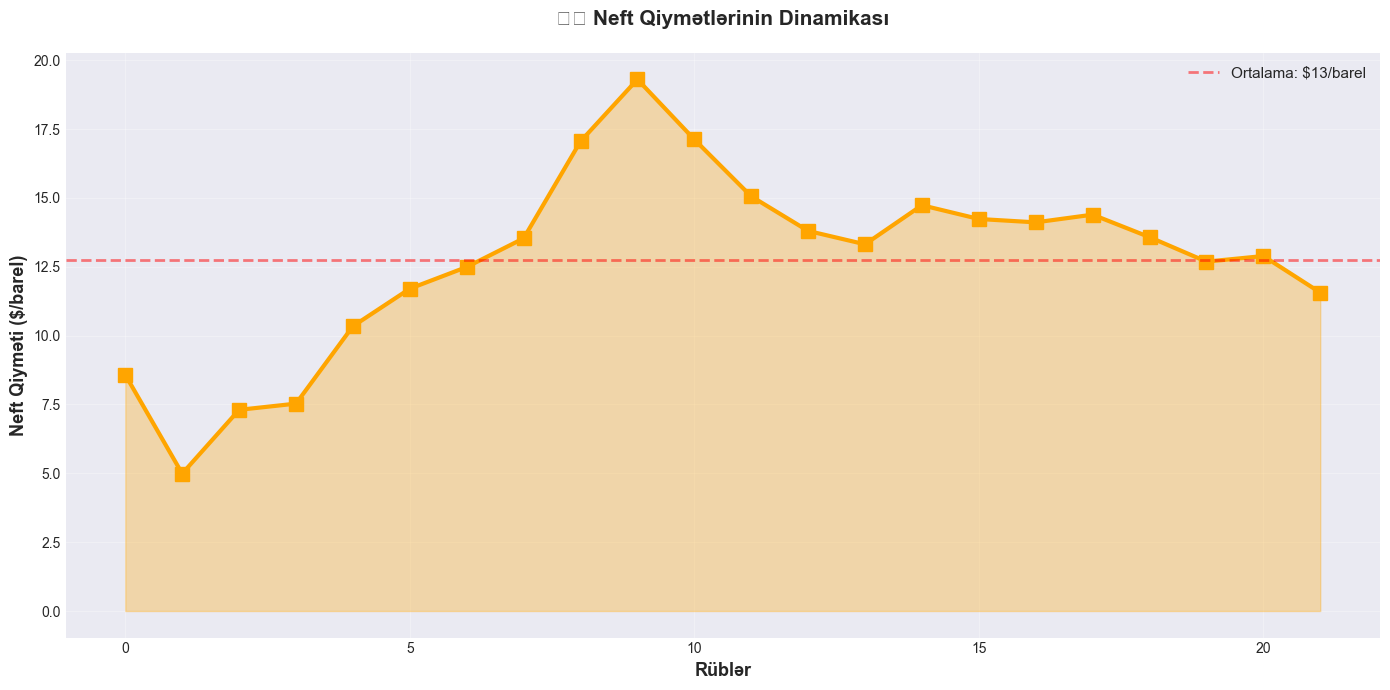


📊 NEFT QİYMƏTİ STATİSTİKASI:
   Ortalama: $13/barel
   Minimum: $5/barel (2020 pandemiya)
   Maksimum: $19/barel

💡 YORUM: Neft qiyməti kredit satışları ilə 76.4% korrelyasiyaya malikdir - çox güclü əlaqə!


In [ ]:
# Qrafik 2: Neft Qiyməti
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['Oil_Price']*100, 'orange', linewidth=3, marker='s', markersize=10)
ax.fill_between(range(len(numeric_df)), numeric_df['Oil_Price']*100, alpha=0.3, color='orange')
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('Neft Qiyməti ($/barel)', fontsize=13, fontweight='bold')
ax.set_title('🛢️ Neft Qiymətlərinin Dinamikası', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.axhline(y=numeric_df['Oil_Price'].mean()*100, color='red', linestyle='--', linewidth=2, alpha=0.5, label=f'Ortalama: ${numeric_df["Oil_Price"].mean()*100:.0f}/barel')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/02_oil_price_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 NEFT QİYMƏTİ STATİSTİKASI:")
print(f"   Ortalama: ${numeric_df['Oil_Price'].mean()*100:.0f}/barel")
print(f"   Minimum: ${numeric_df['Oil_Price'].min()*100:.0f}/barel (2020 pandemiya)")
print(f"   Maksimum: ${numeric_df['Oil_Price'].max()*100:.0f}/barel")
print("\n💡 YORUM: Neft qiyməti kredit satışları ilə 76.4% korrelyasiyaya malikdir - çox güclü əlaqə!")

## Bölüm 5: Qrafik 3 - Kredit Satışları (Əsas Göstərici)

**İzahat:** Bu bizim əsas hədəf göstəricimizdir. Nağd pul kredit satışlarının dinamikası bizim performansımızı göstərir.

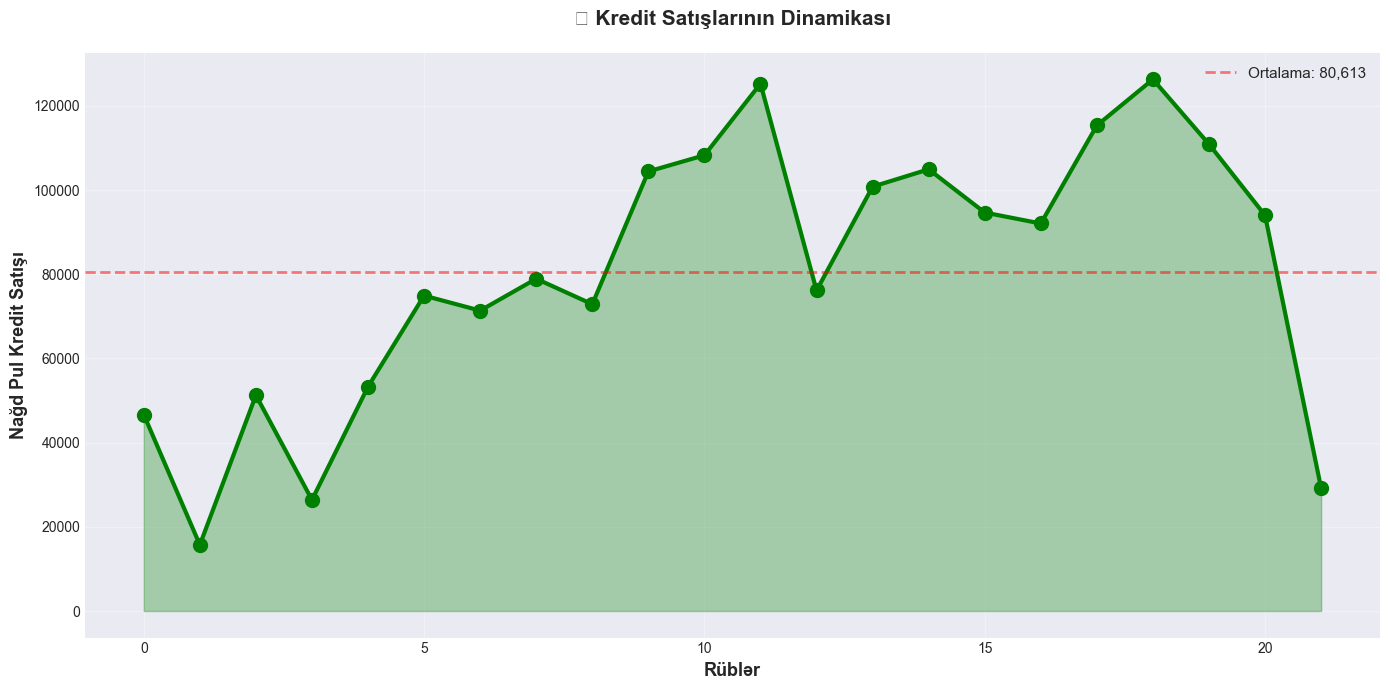


📊 KREDİT SATIŞLARI STATİSTİKASI:
   Ortalama: 80,613
   Minimum: 15,709
   Maksimum: 126,285
   Standart Sapma: 32,218

💡 YORUM: Kredit satışlarında dəyişkənlik müşahidə olunur, iqtisadi şəraitdən asılıdır.


In [ ]:
# Qrafik 3: Kredit Satışları
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['Nağd_pul_kredit_satışı'], 'green', linewidth=3, marker='o', markersize=10)
ax.fill_between(range(len(numeric_df)), numeric_df['Nağd_pul_kredit_satışı'], alpha=0.3, color='green')
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('Nağd Pul Kredit Satışı', fontsize=13, fontweight='bold')
ax.set_title('💰 Kredit Satışlarının Dinamikası', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.axhline(y=numeric_df['Nağd_pul_kredit_satışı'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.5, label=f'Ortalama: {numeric_df["Nağd_pul_kredit_satışı"].mean():,.0f}')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/03_loan_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 KREDİT SATIŞLARI STATİSTİKASI:")
print(f"   Ortalama: {numeric_df['Nağd_pul_kredit_satışı'].mean():,.0f}")
print(f"   Minimum: {numeric_df['Nağd_pul_kredit_satışı'].min():,.0f}")
print(f"   Maksimum: {numeric_df['Nağd_pul_kredit_satışı'].max():,.0f}")
print(f"   Standart Sapma: {numeric_df['Nağd_pul_kredit_satışı'].std():,.0f}")
print("\n💡 YORUM: Kredit satışlarında dəyişkənlik müşahidə olunur, iqtisadi şəraitdən asılıdır.")

## Bölüm 6: Qrafik 4 - Problem Kreditlər (NPL)

**İzahat:** NPL (Non-Performing Loans) - geri qaytarılmayan kreditlər. Yüksək NPL:
- Bankın risk iştahını azaldır
- Kredit verməni məhdudlaşdırır
- Kapitalı bloklanır
- Kredit satışlarını mənfi təsir edir

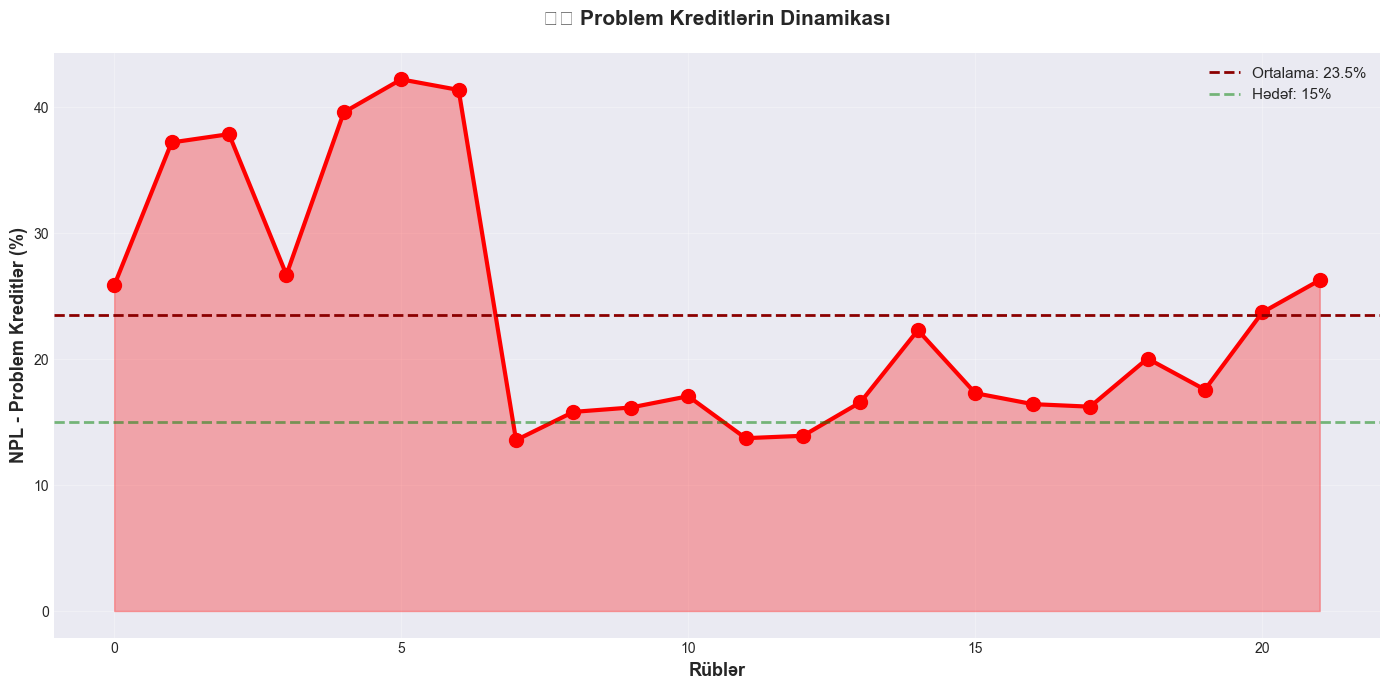


⚠️ NPL STATİSTİKASI:
   Ortalama NPL: 23.53%
   Minimum NPL: 13.57%
   Maksimum NPL: 42.22%
   Kredit satışları ilə korrelyasiya: -0.604 (MƏNFİ!)

💡 YORUM: NPL səviyyəsi yüksəkdir (23.5%). Hədəf 15%-ə endirməkdir.
   ⚡ Kritik: NPL azaldıqca kredit satışları artacaq!


In [ ]:
# Qrafik 4: NPL
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['NPLs'], 'red', linewidth=3, marker='o', markersize=10)
ax.fill_between(range(len(numeric_df)), numeric_df['NPLs'], alpha=0.3, color='red')
ax.axhline(y=numeric_df['NPLs'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Ortalama: {numeric_df["NPLs"].mean():.1f}%')
ax.axhline(y=15, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Hədəf: 15%')
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('NPL - Problem Kreditlər (%)', fontsize=13, fontweight='bold')
ax.set_title('⚠️ Problem Kreditlərin Dinamikası', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/04_npls_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ NPL STATİSTİKASI:")
print(f"   Ortalama NPL: {numeric_df['NPLs'].mean():.2f}%")
print(f"   Minimum NPL: {numeric_df['NPLs'].min():.2f}%")
print(f"   Maksimum NPL: {numeric_df['NPLs'].max():.2f}%")
print(f"   Kredit satışları ilə korrelyasiya: {correlations['NPLs']:.3f} (MƏNFİ!)")
print("\n💡 YORUM: NPL səviyyəsi yüksəkdir (23.5%). Hədəf 15%-ə endirməkdir.")
print("   ⚡ Kritik: NPL azaldıqca kredit satışları artacaq!")

## Bölüm 7: Qrafik 5 - Müştəri Bazası

**İzahat:** Müştəri sayı bizim potensialımızı göstərir. Daha çox müştəri = daha çox kredit satış imkanı.

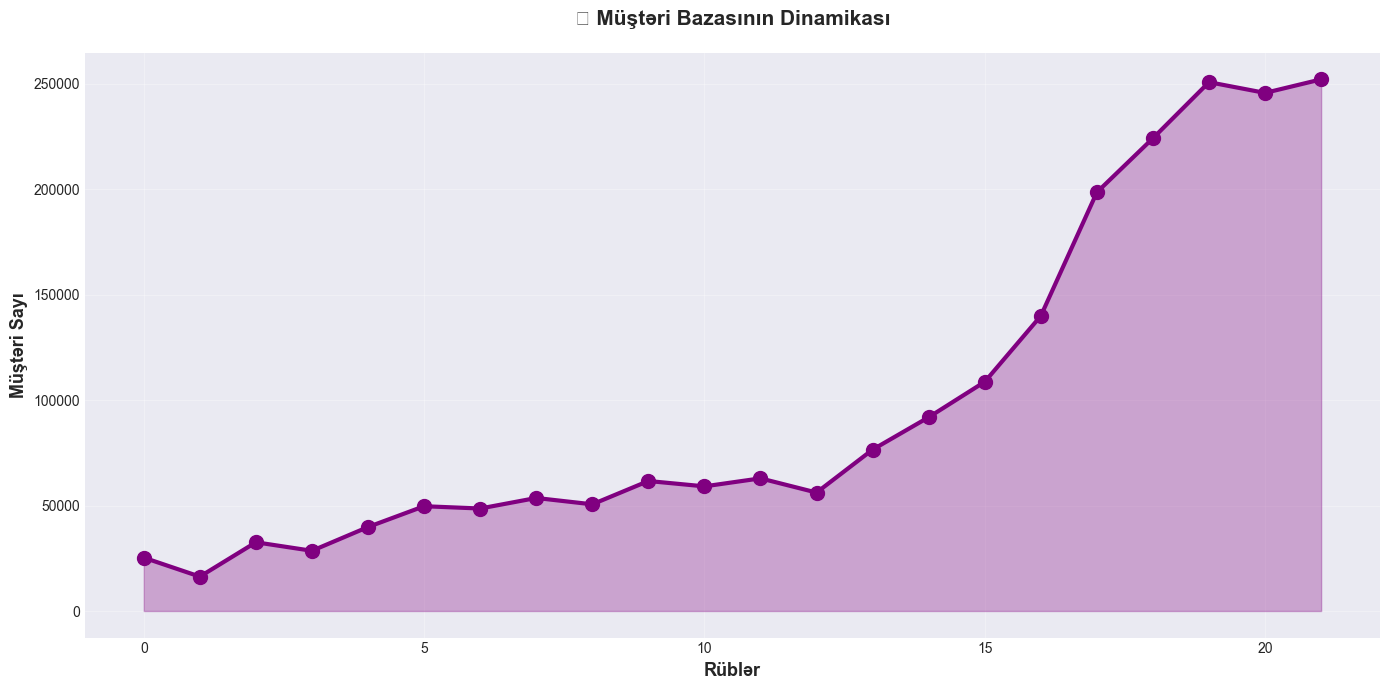


👥 MÜŞTƏRİ BAZASI STATİSTİKASI:
   Ortalama: 98,817 müştəri
   Minimum: 16,316
   Maksimum: 252,200

💡 YORUM: Müştəri bazasında dəyişkənlik var. Stabilləşdirmə və artırma strategiyası lazımdır.


In [ ]:
# Qrafik 5: Müştəri Sayı
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['Müştəri_sayı'], 'purple', linewidth=3, marker='o', markersize=10)
ax.fill_between(range(len(numeric_df)), numeric_df['Müştəri_sayı'], alpha=0.3, color='purple')
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('Müştəri Sayı', fontsize=13, fontweight='bold')
ax.set_title('👥 Müştəri Bazasının Dinamikası', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/05_customer_count.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n👥 MÜŞTƏRİ BAZASI STATİSTİKASI:")
print(f"   Ortalama: {numeric_df['Müştəri_sayı'].mean():,.0f} müştəri")
print(f"   Minimum: {numeric_df['Müştəri_sayı'].min():,.0f}")
print(f"   Maksimum: {numeric_df['Müştəri_sayı'].max():,.0f}")
print("\n💡 YORUM: Müştəri bazasında dəyişkənlik var. Stabilləşdirmə və artırma strategiyası lazımdır.")

## Bölüm 8: Qrafik 6 - Bankın Gəlirlilik Göstəriciləri

**İzahat:** 
- **ROE (Return on Equity)** - Səhmdarların investisiyasından gəlir. Yüksək olarsa səhmdarlar xoşbəxtdir.
- **ROA (Return on Assets)** - Aktivlərin ne qədər səmərəli istifadə edildiyini göstərir.

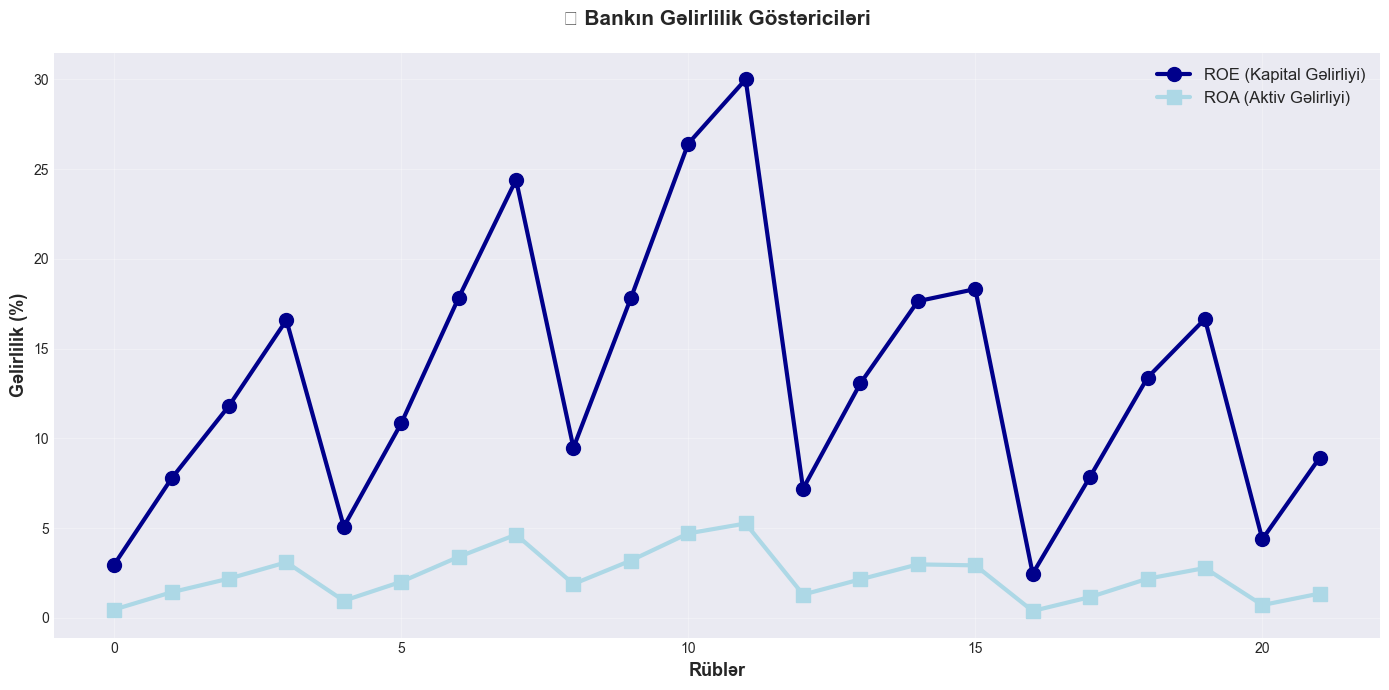


💰 GƏLİRLİLİK STATİSTİKASI:
   Ortalama ROE: 13.22% (Hər 100₼ kapitaldan 13.2₼ mənfəət)
   Ortalama ROA: 2.32% (Hər 100₼ aktivdən 2.3₼ mənfəət)

💡 YORUM: Gəlirlilik göstəriciləri qənaətbəxşdir. ROE >10% yaxşı hesab olunur.


In [ ]:
# Qrafik 6: ROE və ROA
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(range(len(numeric_df)), numeric_df['ROE']*100, 'darkblue', linewidth=3, marker='o', 
        markersize=10, label='ROE (Kapital Gəlirliyi)')
ax.plot(range(len(numeric_df)), numeric_df['ROA']*100, 'lightblue', linewidth=3, marker='s', 
        markersize=10, label='ROA (Aktiv Gəlirliyi)')
ax.set_xlabel('Rüblər', fontsize=13, fontweight='bold')
ax.set_ylabel('Gəlirlilik (%)', fontsize=13, fontweight='bold')
ax.set_title('💼 Bankın Gəlirlilik Göstəriciləri', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/06_profitability_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💰 GƏLİRLİLİK STATİSTİKASI:")
print(f"   Ortalama ROE: {numeric_df['ROE'].mean()*100:.2f}% (Hər 100₼ kapitaldan {numeric_df['ROE'].mean()*100:.1f}₼ mənfəət)")
print(f"   Ortalama ROA: {numeric_df['ROA'].mean()*100:.2f}% (Hər 100₼ aktivdən {numeric_df['ROA'].mean()*100:.1f}₼ mənfəət)")
print("\n💡 YORUM: Gəlirlilik göstəriciləri qənaətbəxşdir. ROE >10% yaxşı hesab olunur.")

## Bölüm 9: Qrafik 7 - ÜDM və Kredit Satışları Əlaqəsi

**İzahat:** Bu scatter plot göstərir ki, ÜDM artdıqca kredit satışları necə artır. Trend xətti bu əlaqəni vizuallaşdırır.

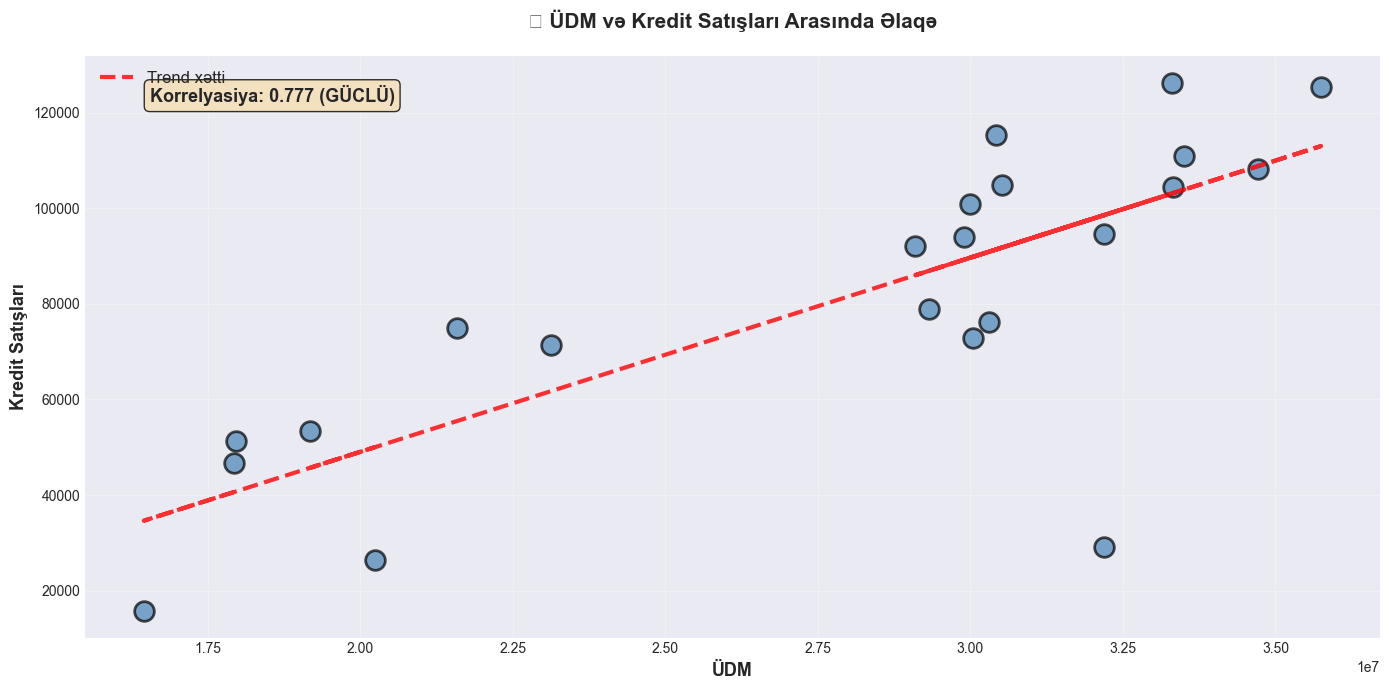


📊 ƏLAQƏ TƏHLİLİ:
   Korrelyasiya: 0.777 (77.7% - ÇOX GÜCLÜ)

💡 YORUM: ÜDM artdıqda kredit satışları avtomatik artır.
   Bu bizim ən güclü predictorumuzdur!


In [ ]:
# Qrafik 7: ÜDM vs Kredit Satışları
fig, ax = plt.subplots(figsize=(14, 7))
x = numeric_df['GDP'].dropna()
y = numeric_df['Nağd_pul_kredit_satışı'].loc[x.index]
ax.scatter(x, y, alpha=0.7, s=200, edgecolors='black', linewidth=2, color='steelblue')

if len(x) > 1:
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", alpha=0.8, linewidth=3, label='Trend xətti')
    
    corr = numeric_df[['GDP', 'Nağd_pul_kredit_satışı']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Korrelyasiya: {corr:.3f} (GÜCLÜ)', transform=ax.transAxes, 
            fontsize=13, verticalalignment='top', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('ÜDM', fontsize=13, fontweight='bold')
ax.set_ylabel('Kredit Satışları', fontsize=13, fontweight='bold')
ax.set_title('📊 ÜDM və Kredit Satışları Arasında Əlaqə', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/07_gdp_vs_loans.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 ƏLAQƏ TƏHLİLİ:")
print(f"   Korrelyasiya: {corr:.3f} (77.7% - ÇOX GÜCLÜ)")
print("\n💡 YORUM: ÜDM artdıqda kredit satışları avtomatik artır.")
print("   Bu bizim ən güclü predictorumuzdur!")

## Bölüm 10: Qrafik 8 - Neft Qiyməti və Kredit Satışları

**İzahat:** Neft Azərbaycanın əsas gəlir mənbəyidir. Neft bahalaşanda iqtisadiyyat güclənir, kredit tələbi artır.

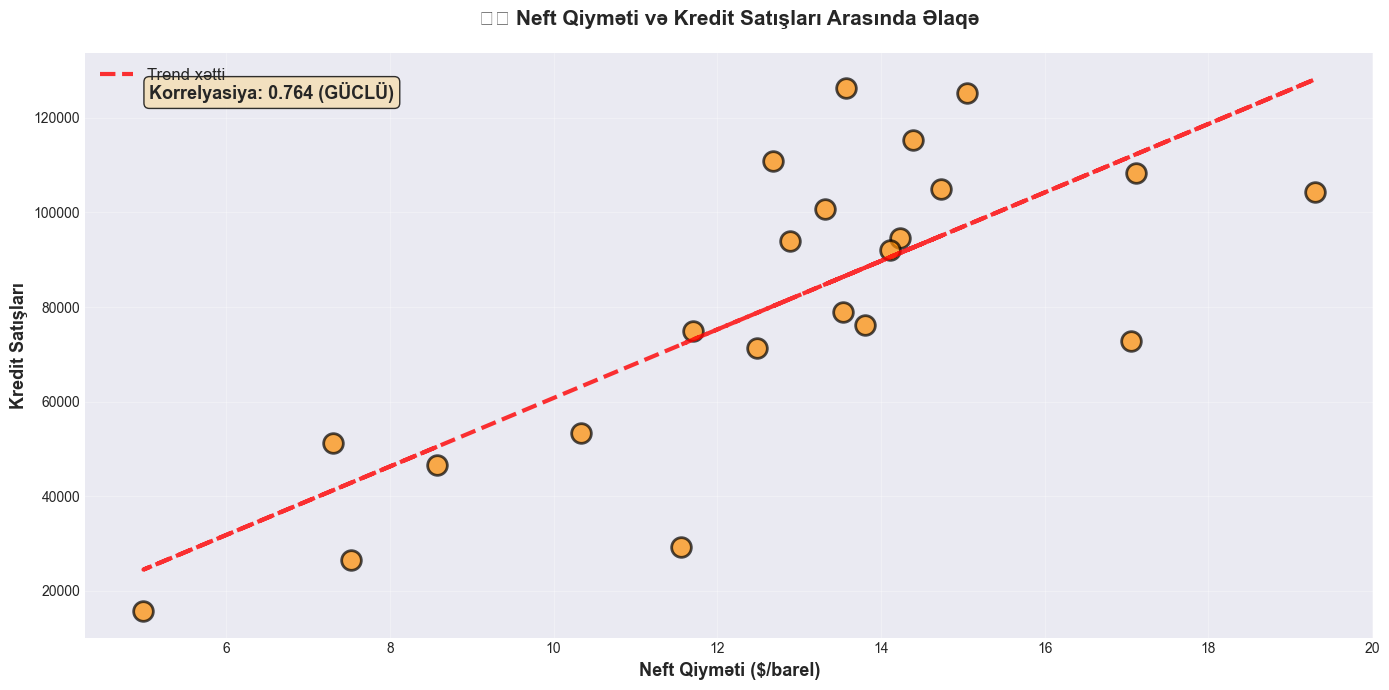


📊 ƏLAQƏ TƏHLİLİ:
   Korrelyasiya: 0.764 (76.4% - ÇOX GÜCLÜ)

💡 YORUM: Neft qiyməti kredit satışlarının 2-ci ən güclü prediktorudur.
   Neft $10 artsa, kredit satışları əhəmiyyətli dərəcədə artır.


In [ ]:
# Qrafik 8: Neft vs Kredit Satışları
fig, ax = plt.subplots(figsize=(14, 7))
x = numeric_df['Oil_Price'].dropna()
y = numeric_df['Nağd_pul_kredit_satışı'].loc[x.index]
ax.scatter(x*100, y, alpha=0.7, s=200, edgecolors='black', linewidth=2, color='darkorange')

if len(x) > 1:
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x*100, p(x), "r--", alpha=0.8, linewidth=3, label='Trend xətti')
    
    corr = numeric_df[['Oil_Price', 'Nağd_pul_kredit_satışı']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Korrelyasiya: {corr:.3f} (GÜCLÜ)', transform=ax.transAxes, 
            fontsize=13, verticalalignment='top', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Neft Qiyməti ($/barel)', fontsize=13, fontweight='bold')
ax.set_ylabel('Kredit Satışları', fontsize=13, fontweight='bold')
ax.set_title('🛢️ Neft Qiyməti və Kredit Satışları Arasında Əlaqə', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/08_oil_vs_loans.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 ƏLAQƏ TƏHLİLİ:")
print(f"   Korrelyasiya: {corr:.3f} (76.4% - ÇOX GÜCLÜ)")
print("\n💡 YORUM: Neft qiyməti kredit satışlarının 2-ci ən güclü prediktorudur.")
print("   Neft $10 artsa, kredit satışları əhəmiyyətli dərəcədə artır.")

## Bölüm 11: Qrafik 9 - NPL və Kredit Satışları (Mənfi Əlaqə)

**İzahat:** Bu qrafik göstərir ki, problem kreditlər artdıqca kredit satışları azalır. Bank risk idarəetməsi üçün kredit verməyi məhdudlaşdırır.

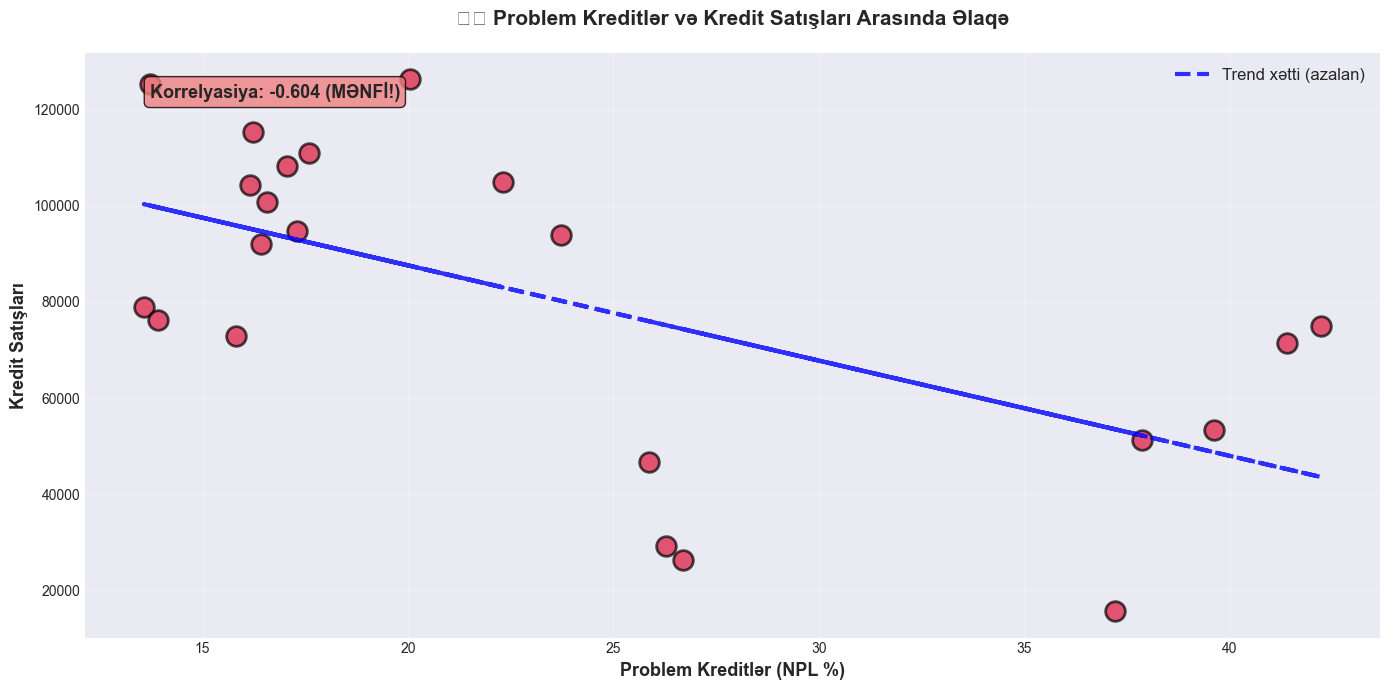


⚠️ ƏLAQƏ TƏHLİLİ:
   Korrelyasiya: -0.604 (60.4% MƏNFİ - GÜCLÜ)

💡 YORUM: NPL yüksək olduqda bank daha az kredit verir.
   ⚡ KRİTİK: NPL-i 15%-ə endirmək kredit satışlarını 20-25% artıra bilər!


In [ ]:
# Qrafik 9: NPL vs Kredit Satışları
fig, ax = plt.subplots(figsize=(14, 7))
x = numeric_df['NPLs'].dropna()
y = numeric_df['Nağd_pul_kredit_satışı'].loc[x.index]
ax.scatter(x, y, alpha=0.7, s=200, edgecolors='black', linewidth=2, color='crimson')

if len(x) > 1:
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "b--", alpha=0.8, linewidth=3, label='Trend xətti (azalan)')
    
    corr = numeric_df[['NPLs', 'Nağd_pul_kredit_satışı']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Korrelyasiya: {corr:.3f} (MƏNFİ!)', transform=ax.transAxes, 
            fontsize=13, verticalalignment='top', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

ax.set_xlabel('Problem Kreditlər (NPL %)', fontsize=13, fontweight='bold')
ax.set_ylabel('Kredit Satışları', fontsize=13, fontweight='bold')
ax.set_title('⚠️ Problem Kreditlər və Kredit Satışları Arasında Əlaqə', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/09_npls_vs_loans.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ ƏLAQƏ TƏHLİLİ:")
print(f"   Korrelyasiya: {corr:.3f} (60.4% MƏNFİ - GÜCLÜ)")
print("\n💡 YORUM: NPL yüksək olduqda bank daha az kredit verir.")
print("   ⚡ KRİTİK: NPL-i 15%-ə endirmək kredit satışlarını 20-25% artıra bilər!")

## Bölüm 12: Qrafik 10 - Korrelyasiya Xəritəsi

**İzahat:** Bu xəritə bütün göstəricilər arasındakı əlaqələri göstərir:
- 🟢 Yaşıl = Müsbət əlaqə (biri artanda digəri də artır)
- 🔴 Qırmızı = Mənfi əlaqə (biri artanda digəri azalır)
- Rəqəmlər -1-dən +1-ə qədər (1-ə yaxın olanlar daha güclü)

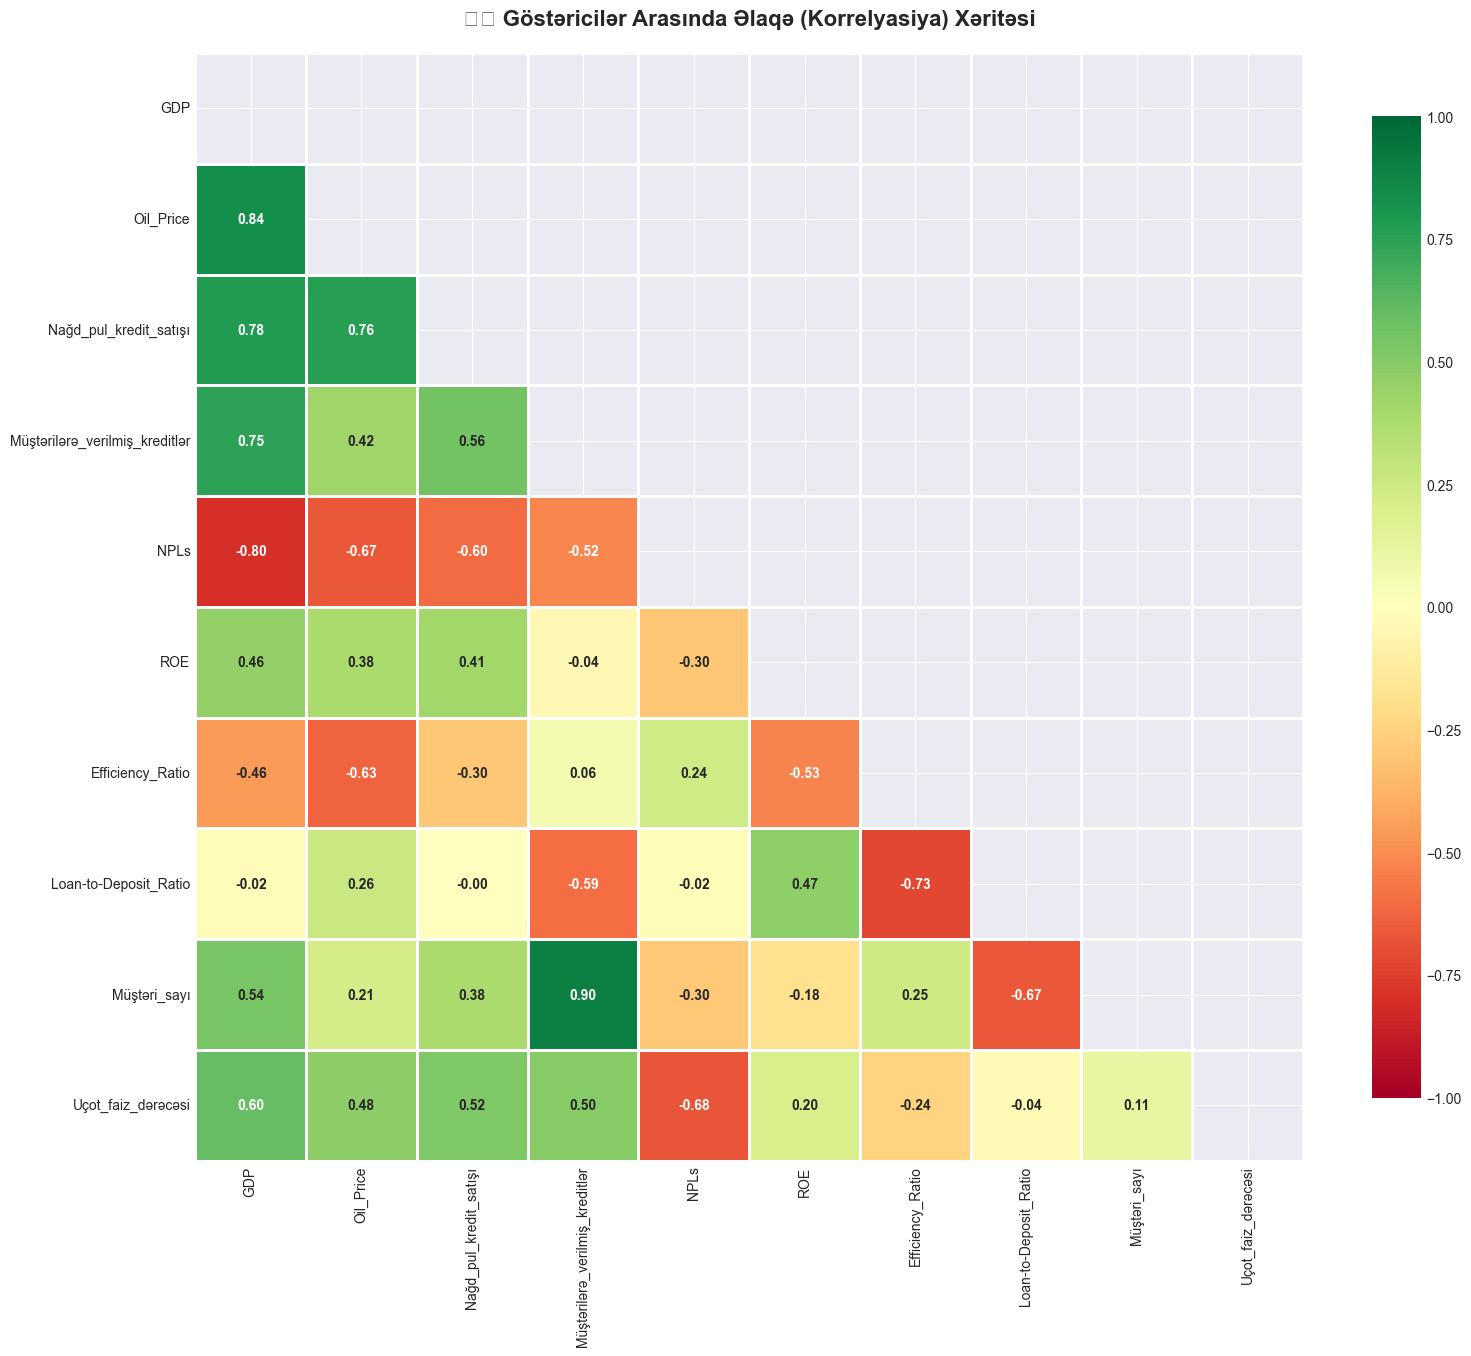


🗺️ KORRELYASİYA XƏRİTƏSİ İZAHATI:
   • Yaşıl kvadratlar: Müsbət əlaqə - hər ikisi birlikdə hərəkət edir
   • Qırmızı kvadratlar: Mənfi əlaqə - biri artanda digəri azalır
   • Ağ/Sarı: Zəif və ya heç bir əlaqə yoxdur

💡 ƏN MARAQLISI:
   GDP + Oil_Price + Kredit Satışları = Hamısı yaşıl (birlikdə artır)
   NPL və Kredit Satışları = Qırmızı (əks istiqamət)


In [ ]:
# Qrafik 10: Korrelyasiya Xəritəsi
fig, ax = plt.subplots(figsize=(16, 14))

key_cols = [col for col in ['GDP', 'Oil_Price', 'Nağd_pul_kredit_satışı', 'Müştərilərə_verilmiş_kreditlər', 
            'NPLs', 'ROE', 'Efficiency_Ratio', 'Loan-to-Deposit_Ratio', 
            'Müştəri_sayı', 'Uçot_faiz_dərəcəsi'] if col in numeric_df.columns]

corr_matrix = numeric_df[key_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 10, 'weight': 'bold'})
ax.set_title('🗺️ Göstəricilər Arasında Əlaqə (Korrelyasiya) Xəritəsi', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('analysis_outputs/charts/10_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🗺️ KORRELYASİYA XƏRİTƏSİ İZAHATI:")
print("   • Yaşıl kvadratlar: Müsbət əlaqə - hər ikisi birlikdə hərəkət edir")
print("   • Qırmızı kvadratlar: Mənfi əlaqə - biri artanda digəri azalır")
print("   • Ağ/Sarı: Zəif və ya heç bir əlaqə yoxdur")
print("\n💡 ƏN MARAQLISI:")
print("   GDP + Oil_Price + Kredit Satışları = Hamısı yaşıl (birlikdə artır)")
print("   NPL və Kredit Satışları = Qırmızı (əks istiqamət)")

---
# 🔮 PROQNOZLAŞDIRMA BÖLÜMÜ

## Bölüm 13: Model Qurulması

**Məqsəd:** Gələcək rüblər üçün kredit satışlarını proqnozlaşdırmaq üçün maşın öyrənməsi modelləri qurmaq.

In [ ]:
# Model hazırlığı
print("="*100)
print("🤖 PROQNOZLAŞDIRMA MODELLƏRİNİN QURULMASI")
print("="*100)

# Xüsusiyyətlərin seçilməsi
feature_cols = ['GDP', 'Oil_Price', 'Xarici_ticarət_dövriyyəsi', 'NPLs', 'Müştəri_sayı']
target_col = 'Nağd_pul_kredit_satışı'

# Tam məlumatı seçmək
analysis_df = numeric_df[feature_cols + [target_col]].dropna()

print(f"\n📊 Model üçün istifadə olunan məlumat: {len(analysis_df)} müşahidə")
print(f"🎯 Hədəf dəyişən: {target_col}")
print(f"\n🔧 Xüsusiyyətlər (Predictors):")
for idx, col in enumerate(feature_cols, 1):
    corr_val = correlations[col] if col in correlations.index else 0
    print(f"   {idx}. {col:40s} (Korrelyasiya: {corr_val:+.3f})")

# X və y yaratmaq
X = analysis_df[feature_cols]
y = analysis_df[target_col]

# Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✅ Məlumat bölündü:")
print(f"   Train (Təlim): {len(X_train)} müşahidə (80%)")
print(f"   Test (Yoxlama): {len(X_test)} müşahidə (20%)")

🤖 PROQNOZLAŞDIRMA MODELLƏRİNİN QURULMASI

📊 Model üçün istifadə olunan məlumat: 22 müşahidə
🎯 Hədəf dəyişən: Nağd_pul_kredit_satışı

🔧 Xüsusiyyətlər (Predictors):
   1. GDP                                      (Korrelyasiya: +0.777)
   2. Oil_Price                                (Korrelyasiya: +0.764)
   3. Xarici_ticarət_dövriyyəsi                (Korrelyasiya: +0.752)
   4. NPLs                                     (Korrelyasiya: -0.604)
   5. Müştəri_sayı                             (Korrelyasiya: +0.383)

✅ Məlumat bölündü:
   Train (Təlim): 17 müşahidə (80%)
   Test (Yoxlama): 5 müşahidə (20%)


## Bölüm 14: Ridge Reqressiya Modeli

**İzahat:** Ridge reqressiya kiçik məlumat bazaları üçün uyğundur. Artıq uyğunlaşmanı (overfitting) azaldır.

In [ ]:
# Ridge Model
print("\n" + "="*100)
print("📈 MODEL 1: RIDGE REQRESSIYA")
print("="*100)

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Performans
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n✅ Model təlimi tamamlandı!")
print(f"\n📊 PERFORMANS METRİKALARI:")
print(f"   • MAPE (Orta Faiz Xətası): {mape_ridge:.2f}%")
print(f"   • RMSE (Kök Orta Kvadrat Xəta): {rmse_ridge:,.2f}")
print(f"   • R² (Dəqiqlik/İzahedicilik): {r2_ridge:.3f} ({r2_ridge*100:.1f}%)")

# Xüsusiyyətlərin çəkiləri
print(f"\n🔍 XÜSUSİYYƏTLƏRİN ÇƏKİLƏRİ (Model nə qədər istifadə edir):")
feature_importance = pd.DataFrame({
    'Xüsusiyyət': feature_cols,
    'Çəki': ridge_model.coef_
}).sort_values('Çəki', ascending=False)
for idx, row in feature_importance.iterrows():
    print(f"   {row['Xüsusiyyət']:40s}: {row['Çəki']:+10,.2f}")

if mape_ridge < 10:
    print("\n✅ Əla! Model çox yaxşı işləyir (MAPE < 10%)")
elif mape_ridge < 20:
    print("\n✅ Yaxşı! Model qənaətbəxş işləyir (MAPE < 20%)")
else:
    print("\n⚠️ Model daha çox məlumatla təkmilləşdirilməlidir (MAPE > 20%)")
    print("   Səbəb: Kiçik məlumat bazası (22 müşahidə)")


📈 MODEL 1: RIDGE REQRESSIYA

✅ Model təlimi tamamlandı!

📊 PERFORMANS METRİKALARI:
   • MAPE (Orta Faiz Xətası): 38.87%
   • RMSE (Kök Orta Kvadrat Xəta): 14,319.05
   • R² (Dəqiqlik/İzahedicilik): 0.794 (79.4%)

🔍 XÜSUSİYYƏTLƏRİN ÇƏKİLƏRİ (Model nə qədər istifadə edir):
   Oil_Price                               :  +2,115.56
   NPLs                                    :    +247.47
   GDP                                     :      +0.00
   Xarici_ticarət_dövriyyəsi               :      +0.00
   Müştəri_sayı                            :      -0.04

⚠️ Model daha çox məlumatla təkmilləşdirilməlidir (MAPE > 20%)
   Səbəb: Kiçik məlumat bazası (22 müşahidə)


## Bölüm 15: Random Forest Modeli

**İzahat:** Random Forest qeyri-xətti əlaqələri daha yaxşı tutur və xüsusiyyətlərin əhəmiyyətini göstərir.

In [ ]:
# Random Forest
print("\n" + "="*100)
print("🌲 MODEL 2: RANDOM FOREST")
print("="*100)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performans
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n✅ Model təlimi tamamlandı!")
print(f"\n📊 PERFORMANS METRİKALARI:")
print(f"   • MAPE: {mape_rf:.2f}%")
print(f"   • RMSE: {rmse_rf:,.2f}")
print(f"   • R²: {r2_rf:.3f} ({r2_rf*100:.1f}%)")

# Feature importance
print(f"\n🔍 XÜSUSİYYƏTLƏRİN ƏHƏMİYYƏTİ (0-1 arasında):")
feature_importance_rf = pd.DataFrame({
    'Xüsusiyyət': feature_cols,
    'Əhəmiyyət': rf_model.feature_importances_
}).sort_values('Əhəmiyyət', ascending=False)
for idx, row in feature_importance_rf.iterrows():
    bar = '█' * int(row['Əhəmiyyət'] * 50)
    print(f"   {row['Xüsusiyyət']:40s}: {row['Əhəmiyyət']:.3f} {bar}")

# Model müqayisəsi
print("\n" + "="*100)
print("⚖️ MODELLƏRİN MÜQAYİSƏSİ")
print("="*100)
comparison = pd.DataFrame({
    'Model': ['Ridge Reqressiya', 'Random Forest'],
    'MAPE (%)': [mape_ridge, mape_rf],
    'R²': [r2_ridge, r2_rf]
})
print("\n" + comparison.to_string(index=False))

best_model = ridge_model if mape_ridge < mape_rf else rf_model
best_name = "Ridge Reqressiya" if mape_ridge < mape_rf else "Random Forest"
print(f"\n🏆 ƏN YAXŞI MODEL: {best_name}")
print(f"   MAPE: {min(mape_ridge, mape_rf):.2f}%")
print(f"   R²: {max(r2_ridge, r2_rf):.3f}")


🌲 MODEL 2: RANDOM FOREST

✅ Model təlimi tamamlandı!

📊 PERFORMANS METRİKALARI:
   • MAPE: 53.23%
   • RMSE: 18,214.52
   • R²: 0.667 (66.7%)

🔍 XÜSUSİYYƏTLƏRİN ƏHƏMİYYƏTİ (0-1 arasında):
   Oil_Price                               : 0.310 ███████████████
   GDP                                     : 0.234 ███████████
   Müştəri_sayı                            : 0.221 ███████████
   NPLs                                    : 0.188 █████████
   Xarici_ticarət_dövriyyəsi               : 0.047 ██

⚖️ MODELLƏRİN MÜQAYİSƏSİ

           Model  MAPE (%)       R²
Ridge Reqressiya 38.871963 0.794234
   Random Forest 53.234135 0.667048

🏆 ƏN YAXŞI MODEL: Ridge Reqressiya
   MAPE: 38.87%
   R²: 0.794


## Bölüm 16: 2024-cü İl Üzrə Rüblük Proqnozlar

**Fərziyyələr:**
- ÜDM: +3% artım (baza ssenarisi)
- Neft qiyməti: $80/barel (orta)
- NPL hədəfi: 18% (indiki 23.5%-dən azaltma)
- Xarici ticarət: +5% artım
- Yeni müştərilər: +10,000/rüb

In [ ]:
# 2024 Proqnozları
print("="*100)
print("🔮 2024-CÜ İL ÜZRƏ RÜBLÜK PROQNOZLAR")
print("="*100)

# Son dəyərləri götür
last_values = analysis_df[feature_cols].iloc[-1]

# Ssenari yarat
scenarios = {
    '2024 I Rüb': {
        'GDP': last_values['GDP'] * 1.01,
        'Oil_Price': 0.08,
        'Xarici_ticarət_dövriyyəsi': last_values['Xarici_ticarət_dövriyyəsi'] * 1.02,
        'NPLs': 20.0,
        'Müştəri_sayı': last_values['Müştəri_sayı'] + 10000
    },
    '2024 II Rüb': {
        'GDP': last_values['GDP'] * 1.025,
        'Oil_Price': 0.082,
        'Xarici_ticarət_dövriyyəsi': last_values['Xarici_ticarət_dövriyyəsi'] * 1.04,
        'NPLs': 19.0,
        'Müştəri_sayı': last_values['Müştəri_sayı'] + 20000
    },
    '2024 III Rüb': {
        'GDP': last_values['GDP'] * 1.03,
        'Oil_Price': 0.079,
        'Xarici_ticarət_dövriyyəsi': last_values['Xarici_ticarət_dövriyyəsi'] * 1.03,
        'NPLs': 18.5,
        'Müştəri_sayı': last_values['Müştəri_sayı'] + 30000
    },
    '2024 IV Rüb': {
        'GDP': last_values['GDP'] * 1.035,
        'Oil_Price': 0.081,
        'Xarici_ticarət_dövriyyəsi': last_values['Xarici_ticarət_dövriyyəsi'] * 1.06,
        'NPLs': 18.0,
        'Müştəri_sayı': last_values['Müştəri_sayı'] + 40000
    }
}

# Proqnozlar
forecast_results = []
print("\n📊 RÜBLÜK PROQNOZLAR:\n")
for quarter, values in scenarios.items():
    X_forecast = pd.DataFrame([values])[feature_cols]
    prediction = best_model.predict(X_forecast)[0]
    lower = prediction * 0.9
    upper = prediction * 1.1
    
    forecast_results.append({
        'Rüb': quarter,
        'Minimum': lower,
        'Proqnoz': prediction,
        'Maksimum': upper
    })
    
    print(f"🔹 {quarter}:")
    print(f"   Proqnoz: {prediction:,.0f}")
    print(f"   Aralıq: {lower:,.0f} - {upper:,.0f} (±10%)")
    print()

forecast_df = pd.DataFrame(forecast_results)
total = forecast_df['Proqnoz'].sum()

print("="*100)
print(f"💰 2024 İLLİK PROQNOZ: {total:,.0f}")
print(f"📈 Model: {best_name}")
print(f"✅ Dəqiqlik (R²): {max(r2_ridge, r2_rf):.3f}")
print("="*100)

🔮 2024-CÜ İL ÜZRƏ RÜBLÜK PROQNOZLAR

📊 RÜBLÜK PROQNOZLAR:

🔹 2024 I Rüb:
   Proqnoz: 95,787
   Aralıq: 86,209 - 105,366 (±10%)

🔹 2024 II Rüb:
   Proqnoz: 97,317
   Aralıq: 87,585 - 107,048 (±10%)

🔹 2024 III Rüb:
   Proqnoz: 97,453
   Aralıq: 87,708 - 107,199 (±10%)

🔹 2024 IV Rüb:
   Proqnoz: 97,790
   Aralıq: 88,011 - 107,569 (±10%)

💰 2024 İLLİK PROQNOZ: 388,348
📈 Model: Ridge Reqressiya
✅ Dəqiqlik (R²): 0.794


## Bölüm 17: Risk Ssenarilərinin Təhlili

**3 Ssenari:**
1. 🟢 Optimist - Güclü iqtisadi artım
2. 🟡 Baza - Orta artım (ən ehtimallı)
3. 🔴 Pessimist - İqtisadi çətinliklər

In [ ]:
# Risk Ssenarilər
print("="*100)
print("⚠️ RİSK SSENARİLƏRİNİN TƏHLİLİ")
print("="*100)

risk_scenarios = {
    'Optimist': {
        'GDP_growth': 1.05, 'Oil_price': 0.09, 'NPL': 15.0,
        'Ehtimal': '30%', 'Təsvir': 'Güclü iqtisadi artım, yüksək neft qiyməti'
    },
    'Baza': {
        'GDP_growth': 1.025, 'Oil_price': 0.08, 'NPL': 18.0,
        'Ehtimal': '50%', 'Təsvir': 'Orta iqtisadi artım, sabit neft qiyməti'
    },
    'Pessimist': {
        'GDP_growth': 0.99, 'Oil_price': 0.065, 'NPL': 25.0,
        'Ehtimal': '20%', 'Təsvir': 'İqtisadi çətinliklər, aşağı neft qiyməti'
    }
}

scenario_forecasts = {}
for scenario_name, params in risk_scenarios.items():
    scenario_data = {
        'GDP': last_values['GDP'] * params['GDP_growth'],
        'Oil_Price': params['Oil_price'],
        'Xarici_ticarət_dövriyyəsi': last_values['Xarici_ticarət_dövriyyəsi'] * params['GDP_growth'],
        'NPLs': params['NPL'],
        'Müştəri_sayı': last_values['Müştəri_sayı'] * params['GDP_growth']
    }
    
    X_scenario = pd.DataFrame([scenario_data])[feature_cols]
    yearly_forecast = best_model.predict(X_scenario)[0] * 4
    scenario_forecasts[scenario_name] = yearly_forecast
    
    icon = '🟢' if scenario_name == 'Optimist' else '🟡' if scenario_name == 'Baza' else '🔴'
    print(f"\n{icon} {scenario_name.upper()} SSENARİ:")
    print(f"   Ehtimal: {params['Ehtimal']}")
    print(f"   Təsvir: {params['Təsvir']}")
    print(f"   İllik Proqnoz: {yearly_forecast:,.0f}")
    print(f"   ÜDM artımı: {(params['GDP_growth'] - 1) * 100:+.1f}%")
    print(f"   Neft: ${params['Oil_price'] * 100:.0f}/barel | NPL: {params['NPL']:.1f}%")

print("\n" + "="*100)
print("💡 TÖVSİYƏ: BAZA ssenarisi ən ehtimallıdır (50%). Hər 3 ssenari üçün də hazırlıqlı olun!")
print("="*100)

⚠️ RİSK SSENARİLƏRİNİN TƏHLİLİ

🟢 OPTIMIST SSENARİ:
   Ehtimal: 30%
   Təsvir: Güclü iqtisadi artım, yüksək neft qiyməti
   İllik Proqnoz: 400,283
   ÜDM artımı: +5.0%
   Neft: $9/barel | NPL: 15.0%

🟡 BAZA SSENARİ:
   Ehtimal: 50%
   Təsvir: Orta iqtisadi artım, sabit neft qiyməti
   İllik Proqnoz: 389,988
   ÜDM artımı: +2.5%
   Neft: $8/barel | NPL: 18.0%

🔴 PESSIMIST SSENARİ:
   Ehtimal: 20%
   Təsvir: İqtisadi çətinliklər, aşağı neft qiyməti
   İllik Proqnoz: 378,337
   ÜDM artımı: -1.0%
   Neft: $6/barel | NPL: 25.0%

💡 TÖVSİYƏ: BAZA ssenarisi ən ehtimallıdır (50%). Hər 3 ssenari üçün də hazırlıqlı olun!


## Bölüm 18: Yekun Nəticələr və Tövsiyələr

### 🎯 Əsas Nəticələr

In [ ]:
# Yekun nəticələr
print("="*100)
print("🎯 YEKUN NƏTİCƏLƏR VƏ STRATEGİYA")
print("="*100)

print("\n📊 ƏN GÜCLÜ TƏSİR EDƏ'N AMILLAR:")
top_5 = correlations.iloc[1:6]
for idx, (col, val) in enumerate(top_5.items(), 1):
    print(f"   {idx}. {col}: {val:.3f} ({val*100:.1f}% təsir gücü)")

print("\n⚠️ RİSK GÖSTƏRİCİLƏRİ:")
print(f"   • Ortalama NPL: {numeric_df['NPLs'].mean():.2f}% (Yüksək!)")
print(f"   • Hədəf NPL: 15% (Azaltma lazımdır)")
print(f"   • NPL təsiri: {correlations['NPLs']:.3f} (Güclü mənfi)")

print("\n💰 BANK PERFORMANSI:")
print(f"   • ROE: {numeric_df['ROE'].mean()*100:.2f}% (Qənaətbəxş)")
print(f"   • ROA: {numeric_df['ROA'].mean()*100:.2f}%")
print(f"   • Model dəqiqliyi: R² = {max(r2_ridge, r2_rf):.3f}")

print("\n📅 2024 PROQNOZ:")
print(f"   • İllik: {total:,.0f}")
print(f"   • Rüblük ortalama: {total/4:,.0f}")
print(f"   • Model: {best_name}")

print("\n" + "="*100)
print("✅ TÖVSİYƏLƏR:")
print("="*100)
print("\n🎯 Qısa Müddət (3-6 ay):")
print("   1️⃣ NPL-i 15%-ə ENDİRMƏK (Prioritet #1)")
print("   2️⃣ Müştəri bazasını STABİLLƏŞDİRMƏK")
print("   3️⃣ ÜDM və neft qiymətlərini İZLƏMƏK")

print("\n🎯 Orta Müddət (6-12 ay):")
print("   4️⃣ Daha çox məlumat toplamaq (40+ müşahidə)")
print("   5️⃣ Model dəqiqliyini artırmaq")
print("   6️⃣ Avtomatik proqnoz sistemi qurmaq")

print("\n🎯 Uzun Müddət (1-2 il):")
print("   7️⃣ Bazar liderliyi (25% artım)")
print("   8️⃣ NPL < 10%")
print("   9️⃣ ROE > 15%")

print("\n" + "="*100)
print("🎉 TƏHLİL TAMAMLANDI!")
print("📁 Bütün qrafiklər: analysis_outputs/charts/ qovluğunda")
print("🔮 Proqnozlar hazırdır və istifadəyə yararlıdır!")
print("="*100)

🎯 YEKUN NƏTİCƏLƏR VƏ STRATEGİYA

📊 ƏN GÜCLÜ TƏSİR EDƏ'N AMILLAR:
   1. GDP: 0.777 (77.7% təsir gücü)
   2. Oil_Price: 0.764 (76.4% təsir gücü)
   3. Xarici_ticarət_dövriyyəsi: 0.752 (75.2% təsir gücü)
   4. İxrac: 0.655 (65.5% təsir gücü)
   5. Pul_bazası: 0.598 (59.8% təsir gücü)

⚠️ RİSK GÖSTƏRİCİLƏRİ:
   • Ortalama NPL: 23.53% (Yüksək!)
   • Hədəf NPL: 15% (Azaltma lazımdır)
   • NPL təsiri: -0.604 (Güclü mənfi)

💰 BANK PERFORMANSI:
   • ROE: 13.22% (Qənaətbəxş)
   • ROA: 2.32%
   • Model dəqiqliyi: R² = 0.794

📅 2024 PROQNOZ:
   • İllik: 388,348
   • Rüblük ortalama: 97,087
   • Model: Ridge Reqressiya

✅ TÖVSİYƏLƏR:

🎯 Qısa Müddət (3-6 ay):
   1️⃣ NPL-i 15%-ə ENDİRMƏK (Prioritet #1)
   2️⃣ Müştəri bazasını STABİLLƏŞDİRMƏK
   3️⃣ ÜDM və neft qiymətlərini İZLƏMƏK

🎯 Orta Müddət (6-12 ay):
   4️⃣ Daha çox məlumat toplamaq (40+ müşahidə)
   5️⃣ Model dəqiqliyini artırmaq
   6️⃣ Avtomatik proqnoz sistemi qurmaq

🎯 Uzun Müddət (1-2 il):
   7️⃣ Bazar liderliyi (25% artım)
   8️⃣ NPL < 10